In [1]:
import os
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
image_size = 200

path1 = r"F:\Tutorials(Learning)\PGA 23\images\Mask_NoMask"
mask = ['Mask' , 'No_Mask' ]

input_image = []
for i in mask:
    folders = os.path.join(path1, i)
    label = mask.index(i)                  # need to tell software which image is of which maskgory
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)    # using cv2, reading image storing variable
        image_array = cv2.resize(image_array, (image_size, image_size))    # resizing image to 200 * 200
        input_image.append([image_array, label])

In [3]:
len(input_image)

8798

In [4]:
import matplotlib.pyplot as plt
import PIL

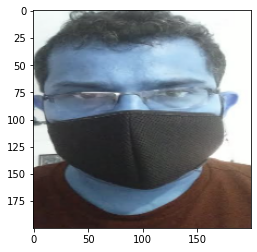

In [5]:
plt.imshow(input_image[0][0])

In [6]:
input_image = input_image[2500:5500]

In [7]:
np.random.shuffle(input_image)

X  = []
Y =  []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

X = np.array(X)
Y = np.array(Y)

In [8]:
X

array([[[[242, 204, 111],
         [242, 206, 117],
         [242, 206, 124],
         ...,
         [240, 217, 170],
         [249, 220, 168],
         [250, 215, 153]],

        [[248, 211, 119],
         [244, 209, 123],
         [241, 208, 128],
         ...,
         [240, 218, 175],
         [250, 223, 172],
         [253, 222, 163]],

        [[248, 212, 123],
         [241, 207, 125],
         [239, 208, 134],
         ...,
         [237, 217, 179],
         [244, 220, 173],
         [251, 222, 166]],

        ...,

        [[241, 219, 162],
         [253, 236, 182],
         [248, 223, 172],
         ...,
         [245, 228, 184],
         [245, 228, 181],
         [238, 216, 168]],

        [[238, 218, 160],
         [248, 230, 173],
         [243, 222, 168],
         ...,
         [240, 222, 176],
         [240, 219, 171],
         [236, 213, 163]],

        [[228, 210, 149],
         [235, 216, 159],
         [236, 216, 162],
         ...,
         [237, 219, 172],
        

In [9]:
len(input_image)

3000

In [10]:
X_train = X[:2550]
X_test = X[2550:]

Y_train = Y[:2550]
Y_test = Y[2550:]

# Normalizing values by dividing 255
X_train = X_train/255  
X_test = X_test/255
X_train.shape

(2550, 200, 200, 3)

In [11]:
X_test.shape

(450, 200, 200, 3)

In [12]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size =(5,5) , activation ='relu' ))
model.add(MaxPool2D(pool_size =(2,2)))
#model.add(Conv2D(filters = 16 , kernel_size =(5,5) , activation ='relu'    ))
#model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())
#model.add(Dense(128 , activation = 'relu' ))
#model.add(Dropout(0.4))
model.add(Dense(2 , activation= 'softmax'))

In [13]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
abc = model.fit(X_train, Y_train, epochs=23, validation_split=0.15)

Epoch 1/23
68/68 [==============================] - 54s 733ms/step - loss: 1.4738 - accuracy: 0.7840 - val_loss: 0.2373 - val_accuracy: 0.9373
Epoch 2/23
68/68 [==============================] - 34s 499ms/step - loss: 0.1629 - accuracy: 0.9455 - val_loss: 0.2140 - val_accuracy: 0.9295
Epoch 3/23
68/68 [==============================] - 33s 478ms/step - loss: 0.1119 - accuracy: 0.9599 - val_loss: 0.1841 - val_accuracy: 0.9452
Epoch 4/23
68/68 [==============================] - 34s 498ms/step - loss: 0.0564 - accuracy: 0.9866 - val_loss: 0.1504 - val_accuracy: 0.9634
Epoch 5/23
68/68 [==============================] - 33s 492ms/step - loss: 0.0422 - accuracy: 0.9871 - val_loss: 0.1590 - val_accuracy: 0.9556
Epoch 6/23
68/68 [==============================] - 33s 479ms/step - loss: 0.0249 - accuracy: 0.9963 - val_loss: 0.1621 - val_accuracy: 0.9582
Epoch 7/23
68/68 [==============================] - 34s 507ms/step - loss: 0.0212 - accuracy: 0.9945 - val_loss: 0.1694 - val_accuracy: 0.9582

In [15]:
pred = model.predict(X_test)
pred_classes = np.argmax(pred, 1)

15/15 [==============================] - 4s 155ms/step


In [16]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred_classes, Y_test)
tab

array([[347,   8],
       [  8,  87]], dtype=int64)

In [17]:
Acc = tab.diagonal().sum()*100/tab.sum()
Acc

96.44444444444444

In [18]:
df1 = pd.DataFrame(abc.history)  # converting into Data frame
df1.head(50)

,loss,accuracy,val_loss,val_accuracy
0,1.473775,0.784033,0.237315,0.937337
1,0.162919,0.945547,0.214036,0.929504
2,0.111906,0.959852,0.184111,0.945170
3,0.056372,0.986617,0.150356,0.963446
4,0.042239,0.987079,0.159019,0.955614
5,0.024871,0.996308,0.162098,0.958225
6,0.021241,0.994462,0.169394,0.958225
7,0.009666,0.999077,0.158670,0.963446
8,0.004799,1.000000,0.174317,0.955614
9,0.002783,1.000000,0.176702,0.968668


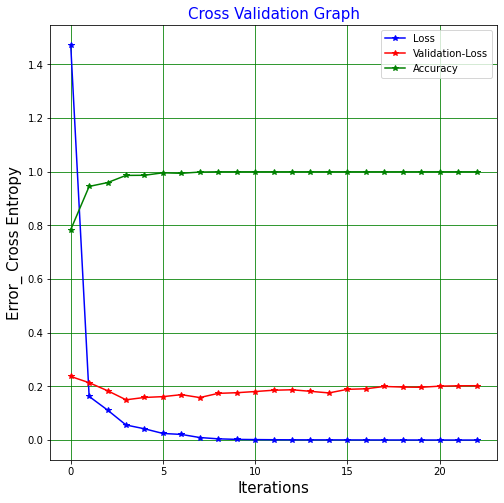

In [19]:
plt.figure(figsize= (8, 8))
plt.plot(df1.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df1.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.plot(df1.accuracy , color = "g" , marker ="*"  , label ="Accuracy")
plt.grid(color = "green")
plt.xlabel("Iterations" , size = 15)
plt.ylabel("Error_ Cross Entropy" , size = 15)
plt.title("Cross Validation Graph" , color ="blue" , size = 15)
plt.legend()

## Save build model

In [23]:
#model.save('Mask_NoMask.h5')

## Load model for later use

In [21]:
#newName = load_model('MaskNoMask.h5')
#newName.predict(input data)